In [1265]:
import numpy as np

In [1267]:
import matplotlib.pyplot as plt

In [1393]:
import math

In [1461]:
# Построить график стационарного процесса {h_n} и график волатильности {sigma_n} процесса GARCH(1,0), n=1000 наблюдений
def GARCH(ab, h_sigma ,n, p, q):
    h = h_sigma[0]
    sigma = h_sigma[1]
    
    for k in range(0,n):
        sum_q = 0
        sum_p = 0
        for i in range(1,p+1):
            if i == p+1:
                break
            sum_p = sum_p + ab[0][i]*(h[k+p-i]*h[k+p-i])
        for j in range(1,q+1):
            if j == q+1:
                break
            sum_q = sum_q + ab[1][j]*(sigma[k+q-j])
        sigma.insert(k+p,ab[0][0] + sum_p + sum_q)
        h.insert(k+p,(math.sqrt(sigma[k+p]))*np.random.normal(0, 1, 1)[0]) 
    vector = [h[p:],sigma[p:]]
    return vector
        

Text(0.5, 1.0, 'sigma')

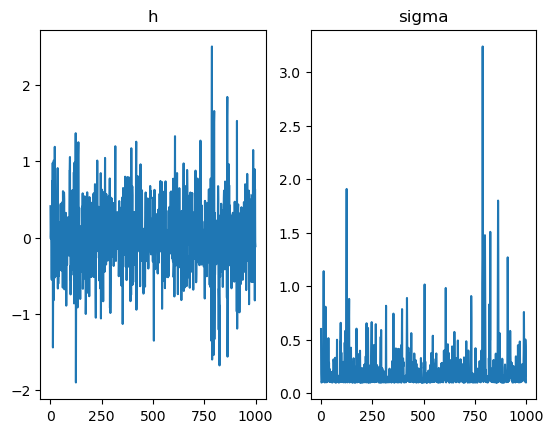

In [1463]:
ab = [[0.1,0.5] # параметры a0 и a1
      ,[0,0]]  # заполнитель и параметр b1 = ab[1][1], в данном случае просто заглушки
h_sigma = [[1], # начальное значение h_0
           [1]] # sigma_0
x = GARCH(ab, h_sigma, 1000, 1, 0)
figure, axis = plt.subplots(1, 2)
axis[0].plot(x[0])
axis[0].set_title("h")
axis[1].plot(x[1])
axis[1].set_title("sigma")

In [1465]:
# Оценить параметры a0 и a1 с помощью метода наименьших квадратов (МНК), путем преобразования процесса ARCH(1)≡GARCH(1,0) к
# процессу авторегрессии первого порядка.

In [1471]:
def a_fit(h):
    sum_1 = 0
    sum_2 = 0
    sum_3 = 0
    sum_4 = 0
    for k in range(1, len(h)):   
        sum_1 = sum_1 + (h[k]**2)*(h[k-1]**2)
        sum_2 = sum_2 + h[k]**2
        sum_3 = sum_3 + h[k-1]**2
        sum_4 = sum_4 + h[k-1]**4
    a1 = -(sum_1 - sum_2*sum_3/(len(h)))/((sum_3*sum_3)/(len(h)) - sum_4)
    return [(sum_2-a1*sum_3)/(len(h)), a1]

In [1473]:
ab = [[0.1,0.5] # параметры a0 и a1
      ,[0,0]]  # заполнитель и параметр b1 = ab[1][1]
h_sigma = [[1], # начальное значение h_0
           [0.1]] # sigma_0
x = GARCH(ab, h_sigma, 1000, 1, 0)

print("a0 , a1 -> ", a_fit(x[0]))

a0 , a1 ->  [0.13125744321051144, 0.4190739450228044]


In [1475]:
# Оценить параметры a0 a1 при помощи функции garch() пакета tseries по
# выборке {hn}.
# в данном случае оцениваем с помощью arch, параметр омега это a0
import numpy as np
import pandas as pd
from arch import arch_model

# Пример данных (например, случайные данные)

ab = [[0.2,0.7],[0,0]] # a0 = 0.2  a1 = 0.7
h_sigma = [[0.5],[0.5]] # начальные параметры
x = GARCH(ab, h_sigma, 1000, 1, 0)
# Создание модели GARCH(1, 0)
model = arch_model(x[0], vol='Garch', p=1, q=0)

# Оценка модели
results = model.fit()

# Вывод параметров модели
print(results.params) 


Iteration:      1,   Func. Count:      5,   Neg. LLF: 5288.35183826253
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2128.5870512076017
Iteration:      3,   Func. Count:     20,   Neg. LLF: 489122.4144273792
Iteration:      4,   Func. Count:     25,   Neg. LLF: 288517.3716656196
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1016.6048310338721
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1013.7248270166062
Iteration:      7,   Func. Count:     38,   Neg. LLF: 1009.5828510736683
Iteration:      8,   Func. Count:     42,   Neg. LLF: 1008.4574789011222
Iteration:      9,   Func. Count:     46,   Neg. LLF: 1008.2317799616602
Iteration:     10,   Func. Count:     50,   Neg. LLF: 1008.2240403190689
Iteration:     11,   Func. Count:     54,   Neg. LLF: 1008.2239905435906
Iteration:     12,   Func. Count:     57,   Neg. LLF: 1008.2239905435379
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1008.2239905435906
            Iterati

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5974.791400178008
Iteration:      2,   Func. Count:     17,   Neg. LLF: 679175.4645622259
Iteration:      3,   Func. Count:     24,   Neg. LLF: 170868.9701610141
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2788.078347785124
Iteration:      5,   Func. Count:     38,   Neg. LLF: 4098.45881418552
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1968.1422294465842
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1157.3309811957783
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2653.7737866123825
Iteration:      9,   Func. Count:     66,   Neg. LLF: 1142.816979154681
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1138.2783739680413
Iteration:     11,   Func. Count:     79,   Neg. LLF: 1138.0717193819817
Iteration:     12,   Func. Count:     85,   Neg. LLF: 1138.0555484142578
Iteration:     13,   Func. Count:     91,   Neg. LLF: 1138.0458264928384
Iteration:     14,   Func. Count:     97,   Neg. LLF: 1138

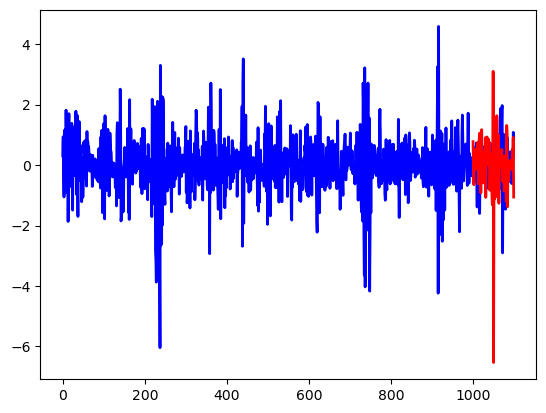

In [1477]:
# Построить график стационарного процесса GARCH(30), из n = 1100
# наблюдений. Разделить процесс на обучающую и тестовую выборки в от
# ношении 10:1. Оценить вектор параметров (a0 a1 a2 a3)′ на обучающей
# выборке, используя функцию garch(). Затем вычислить последователь
# ность прогнозов на 1 шаг {hn+1|n} на тестовой выборке и наложить про
# гнозы на график модулей процесса.

ab = [[0.2,0.4,0.3,0.1],[0,0,0,0]] # a0 = 0.2  a1 = 0.6
h_sigma = [[1,0.5,1],[1,0.3,0.7]]
x = GARCH(ab, h_sigma, 1100, 3, 0)
#x = [[element * 10 for element in sublist] for sublist in x]
training = x[0][:1000]
test = x[0][1000:]

model = arch_model(training, vol='Garch', p=3, q=0)

# Оценка модели
results = model.fit()

# Вывод параметров модели
print("Оценки параметров:")
print(results.params) 

ab = [[results.params['omega'],results.params['alpha[1]'],results.params['alpha[2]'],results.params['alpha[3]']],[0,0,0,0]]
h_sigma = [x[0][(len(x[0])-3):],x[1][(len(x[1])-3):]]
h_sigma = GARCH(ab, h_sigma, 3, 3, 0)

result_test = GARCH(ab, h_sigma, 100, 3, 0) 

plt.plot( x[0], label='process', color='blue', linewidth=2)
plt.plot(range(1000,1100), result_test[0] , label='result_test', color='red', linewidth='2')


In [1481]:
# Построить стационарный процесс GARCH(11), из n = 1000 наблюдений
# и оценить его параметры (a0 a1 b1)′ по выборке {hn}, используя функцию
# garch()
# оценка через arch
ab = [[0.1,0.5],[0,0.3]]
h_sigma = [[1],[1]]
x = GARCH(ab, h_sigma, 1000, 1, 1)

model = arch_model(x[0], vol='Garch', p=1, q=1)

# Оценка модели
results = model.fit()
print(results.params)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 73020906716.14471
Iteration:      2,   Func. Count:     15,   Neg. LLF: 545270221.1542436
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1347.4591183262241
Iteration:      4,   Func. Count:     27,   Neg. LLF: 942.3722336444879
Iteration:      5,   Func. Count:     35,   Neg. LLF: 915.19463184079
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1019.1426617166595
Iteration:      7,   Func. Count:     47,   Neg. LLF: 846.1975854217588
Iteration:      8,   Func. Count:     52,   Neg. LLF: 845.547031782453
Iteration:      9,   Func. Count:     57,   Neg. LLF: 845.2427764440921
Iteration:     10,   Func. Count:     62,   Neg. LLF: 845.2263608961739
Iteration:     11,   Func. Count:     67,   Neg. LLF: 845.2260740105146
Iteration:     12,   Func. Count:     72,   Neg. LLF: 845.2260707845104
Iteration:     13,   Func. Count:     76,   Neg. LLF: 845.2260707845824
Optimization terminated successfully    (Exit mode 0)
           